# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
# Imporatando Pacotes.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

%matplotlib inline

In [10]:
# Versões do Sistema.

%reload_ext watermark
%watermark --iversions --python

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.12.0

pandas     : 2.0.3
seaborn    : 0.12.2
numpy      : 1.23.5
matplotlib : 3.7.1
statsmodels: 0.14.0



In [2]:
# Lendo CSV heart-disesase.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
colunas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv(url, 
                 names=colunas)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Adicionando Flag para Doentes e não Doentes.
df['flag_doente'] = ((df['num'] != 0).astype('int64')
                                     .replace({0: 'Saudavel', 1: 'Doente'}))

# Definindo sex 'Feminino' e 'Masculino' como dado categórico.
df['sex'] = df['sex'].replace({0: 'Feminino', 1: 'Masculino'})

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,Masculino,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Saudavel
1,67.0,Masculino,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Doente
2,67.0,Masculino,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Doente
3,37.0,Masculino,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Saudavel
4,41.0,Feminino,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Saudavel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,Masculino,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,Doente
299,68.0,Masculino,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,Doente
300,57.0,Masculino,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,Doente
301,57.0,Feminino,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,Doente


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# Criando bivariada para 'sex' através do pd.crosstab().
# Nº de saudáveis
# Nº de doentes
# Total
tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins=True, margins_name='Total')

# Quantidade média de doentes.
tab_sex['media_doentes'] = tab_sex['Doente']/tab_sex['Total']

# Odds
tab_sex['Chance_Odds_Doentes'] = tab_sex['Doente']/tab_sex['Saudavel']

# Odds ratio
tab_sex['RC_vs_total_OddsRatio'] = tab_sex['Chance_Odds_Doentes']/tab_sex.loc['Total', 'Chance_Odds_Doentes']

# Logito (LOG(Odds))
tab_sex['Logito'] = np.log(tab_sex['Chance_Odds_Doentes'])

# Log do Odds ratio - Weight of Evidence (WOE)
tab_sex['WOE'] = np.log(tab_sex['RC_vs_total_OddsRatio'])

tab_sex

flag_doente,Doente,Saudavel,Total,media_doentes,Chance_Odds_Doentes,RC_vs_total_OddsRatio,Logito,WOE
sex,,,,,,,,
Feminino,25,72,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
Masculino,114,92,206,0.553398,1.239130,1.461996,0.214410,0.379802
Total,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [5]:
# Categorizando a variável 'age' em 5 grupos.

print(df['age'].sort_values().unique().size/5)
print('-------------------------------------')
print(df['age'].sort_values().unique()[0:8])
print(df['age'].sort_values().unique()[8:16])
print(df['age'].sort_values().unique()[16:24])
print(df['age'].sort_values().unique()[24:32])
print(df['age'].sort_values().unique()[32:41])
print('-------------------------------------')

df['age_cat'] = pd.cut(df['age'], bins=[28, 41, 49, 57, 65, 77], labels=['29 a 41 Anos', '42 a 49 Anos', '50 a 57 Anos', '58 a 65 Anos', '66 a 77 Anos'])
df['age_cat'].value_counts().sort_index()

8.2
-------------------------------------
[29. 34. 35. 37. 38. 39. 40. 41.]
[42. 43. 44. 45. 46. 47. 48. 49.]
[50. 51. 52. 53. 54. 55. 56. 57.]
[58. 59. 60. 61. 62. 63. 64. 65.]
[66. 67. 68. 69. 70. 71. 74. 76. 77.]
-------------------------------------


age_cat
29 a 41 Anos    28
42 a 49 Anos    59
50 a 57 Anos    92
58 a 65 Anos    91
66 a 77 Anos    33
Name: count, dtype: int64

In [7]:
# Criando bivariada para 'age' através do pd.crosstab().
# Nº de saudáveis
# Nº de doentes
# Total
tab_age = pd.crosstab(df['age_cat'], df['flag_doente'], margins=True, margins_name='Total')

# Quantidade média de doentes.
tab_age['media_doentes'] = tab_age['Doente']/tab_age['Total']

# Odds
tab_age['Chance_Odds_Doentes'] = tab_age['Doente']/tab_age['Saudavel']

# Odds ratio
tab_age['RC_vs_total_OddsRatio'] = tab_age['Chance_Odds_Doentes']/tab_age.loc['Total', 'Chance_Odds_Doentes']

# Logito (LOG(Odds))
tab_age['Logito'] = np.log(tab_age['Chance_Odds_Doentes'])

# Log do Odds ratio - Weight of Evidence (WOE)
tab_age['WOE'] = np.log(tab_age['RC_vs_total_OddsRatio'])

# Valor médio da variável Age.
tab_age['media_age'] = df.groupby(df['age_cat'])['age'].mean()
tab_age.loc['Total', 'media_age'] = tab_age['media_age'][0:5].mean()

tab_age

flag_doente,Doente,Saudavel,Total,media_doentes,Chance_Odds_Doentes,RC_vs_total_OddsRatio,Logito,WOE,media_age
age_cat,,,,,,,,,
29 a 41 Anos,7,21,28,0.250000,0.333333,0.393285,-1.098612,-0.933220,38.321429
42 a 49 Anos,19,40,59,0.322034,0.475000,0.560432,-0.744440,-0.579048,45.118644
50 a 57 Anos,39,53,92,0.423913,0.735849,0.868196,-0.306730,-0.141338,53.815217
58 a 65 Anos,58,33,91,0.637363,1.757576,2.073687,0.563935,0.729328,60.934066
66 a 77 Anos,16,17,33,0.484848,0.941176,1.110453,-0.060625,0.104768,68.606061
Total,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000,53.359083


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

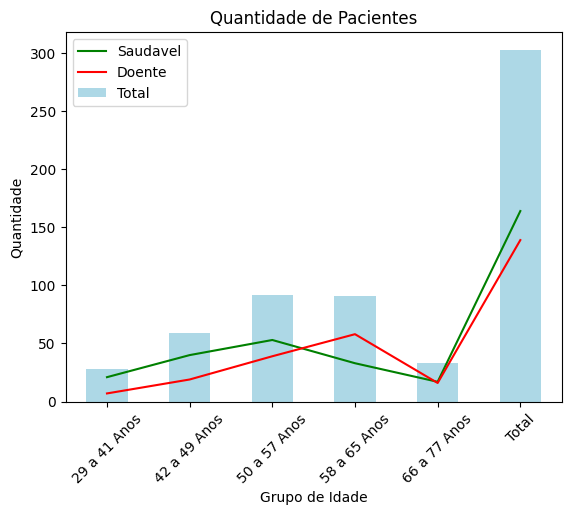

In [33]:
# Percebe-se que o número de Doentes é maior que o número de Saudáveis em Pacientes com idade de 58 a 65 Anos.
ax = tab_age['Total'].plot(kind='bar', color='lightblue')
ax = tab_age['Saudavel'].plot(color='green')
ax = tab_age['Doente'].plot(color='red')

ax.tick_params(axis='x', rotation=45)
plt.legend(loc='best')
plt.title('Quantidade de Pacientes')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Grupo de Idade')
plt.show()

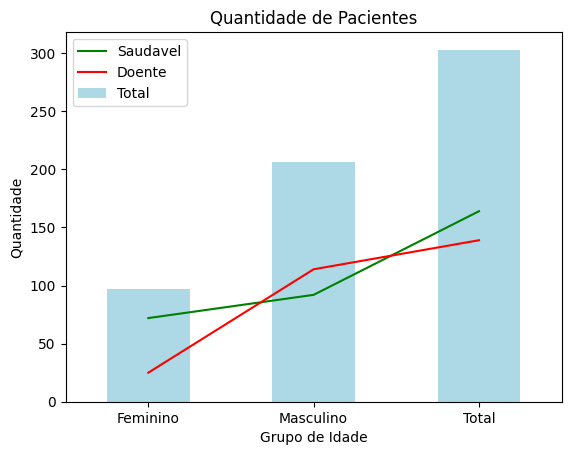

In [56]:
# Percebe-se que o número de Doentes é maior que o número de Saudáveis em Pacientes do sexo Masculino.
ax = tab_sex['Total'].plot(kind='bar', color='lightblue')
ax = tab_sex['Saudavel'].plot(color='green')
ax = tab_sex['Doente'].plot(color='red')

plt.legend(loc='best')
plt.title('Quantidade de Pacientes')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Grupo de Idade')
plt.show()